In [2]:
import requests
import pandas as pd
import os
from datetime import datetime, timedelta

# 📍 New Delhi station code
station_number = "42182"

# 📅 Date range: 1st August to 7th August 2025
start_date = datetime(2025, 8, 1)
end_date = datetime(2025, 8, 8)

# 💾 Base path for saving
desktop_base = r"C:\Users\study\OneDrive\Desktop"
folder_name = "Delhi Data"
folder_path = os.path.join(desktop_base, folder_name)

# 📁 Create folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# 🌐 University of Wyoming upper air sounding base URL
base_url = "https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST"

# ⏳ Loop through each date
date = start_date
while date <= end_date:
    year = date.year
    month = f"{date.month:02d}"
    day = f"{date.day:02d}"
    
    # Construct full URL
    full_url = f"{base_url}&YEAR={year}&MONTH={month}&FROM={day}00&TO={day}00&STNM={station_number}"
    
    # Get response
    response = requests.get(full_url)
    text_data = response.text

    # Parse lines
    lines = text_data.splitlines()

    # Locate header
    data_start_index = None
    for idx, line in enumerate(lines):
        if 'PRES' in line and 'HGHT' in line:
            data_start_index = idx
            break

    if data_start_index is None:
        print(f"⚠️ No header found for {date.strftime('%Y-%m-%d')}")
        date += timedelta(days=1)
        continue

    header = lines[data_start_index].split()
    data_lines = lines[data_start_index + 1:]

    # Extract data rows
    parsed_data = []
    for line in data_lines:
        if line.strip() == "" or '----' in line:
            continue
        row = line.split()
        if len(row) == len(header):
            parsed_data.append(row)

    if not parsed_data:
        print(f"⚠️ No data for {date.strftime('%Y-%m-%d')}")
        date += timedelta(days=1)
        continue

    # DataFrame
    df = pd.DataFrame(parsed_data, columns=header)

    # Convert to numbers
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Save to CSV inside 'Delhi Data' folder
    filename = f"sounding_{station_number}_{date.strftime('%Y-%m-%d')}.csv"
    filepath = os.path.join(folder_path, filename)
    df.to_csv(filepath, index=False)

    print(f"✅ Saved: {filename}")
    date += timedelta(days=1)


✅ Saved: sounding_42182_2025-08-01.csv
✅ Saved: sounding_42182_2025-08-02.csv
✅ Saved: sounding_42182_2025-08-03.csv
✅ Saved: sounding_42182_2025-08-04.csv
✅ Saved: sounding_42182_2025-08-05.csv
✅ Saved: sounding_42182_2025-08-06.csv
✅ Saved: sounding_42182_2025-08-07.csv
✅ Saved: sounding_42182_2025-08-08.csv


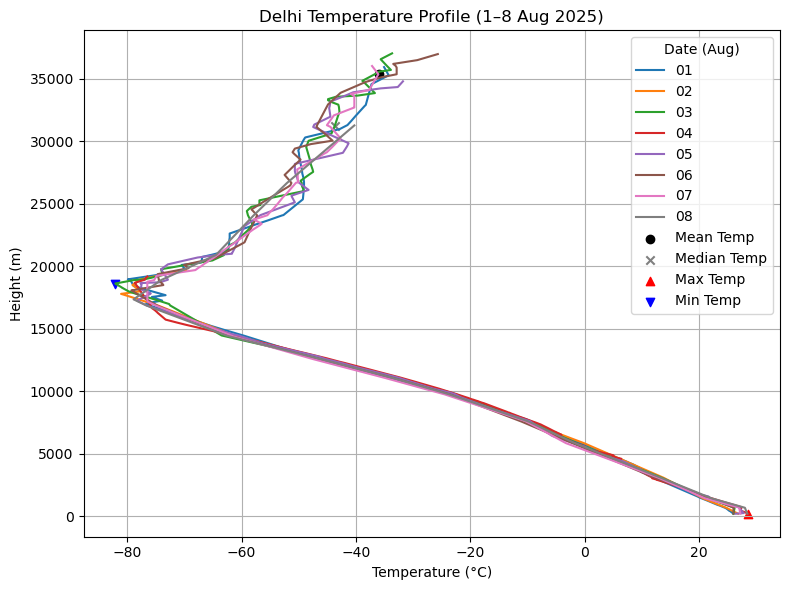

---- Temperature Statistics (1–8 Aug 2025) ----
Mean Temperature   : -36.03 °C at ~35365 m
Median Temperature : -43.70 °C at ~31260 m
Standard Deviation : 32.42 °C
Max Temperature    : 28.60 °C at ~216 m
Min Temperature    : -82.10 °C at ~18626 m


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Folder path
folder_path = r"C:\Users\study\OneDrive\Desktop\Delhi Data"

# Color cycle for 8 days
colors = plt.cm.tab10.colors

# All temperatures and heights
all_temperatures = []
all_heights = []

plt.figure(figsize=(8, 6))

# Loop through each day
for day in range(1, 9):
    file_name = f"sounding_42182_2025-08-{day:02d}.csv"
    file_path = os.path.join(folder_path, file_name)
    
    df = pd.read_csv(file_path)
    df = df[['HGHT', 'TEMP']].dropna()
    
    # Plot temperature profile
    plt.plot(df['TEMP'], df['HGHT'], label=f"{day:02d}", color=colors[(day-1) % len(colors)])
    
    # Collect data for stats
    all_temperatures.extend(df['TEMP'].tolist())
    all_heights.extend(df['HGHT'].tolist())

# Convert to NumPy arrays
temps = np.array(all_temperatures)
heights = np.array(all_heights)

# Calculate statistics
mean_temp = np.mean(temps)
median_temp = np.median(temps)
std_temp = np.std(temps)
max_temp = np.max(temps)
min_temp = np.min(temps)

# Get corresponding heights for plotted markers (approximate)
mean_height = heights[np.abs(temps - mean_temp).argmin()]
median_height = heights[np.abs(temps - median_temp).argmin()]
max_height = heights[temps.argmax()]
min_height = heights[temps.argmin()]

# Plot key statistical markers
plt.scatter(mean_temp, mean_height, color='black', marker='o', label='Mean Temp')
plt.scatter(median_temp, median_height, color='gray', marker='x', label='Median Temp')
plt.scatter(max_temp, max_height, color='red', marker='^', label='Max Temp')
plt.scatter(min_temp, min_height, color='blue', marker='v', label='Min Temp')

# Labels and legend
plt.xlabel("Temperature (°C)")
plt.ylabel("Height (m)")
plt.title("Delhi Temperature Profile (1–8 Aug 2025)")
plt.grid(True)
plt.legend(title="Date (Aug)")
plt.tight_layout()

# Show plot
plt.show()

# Print statistics
print("---- Temperature Statistics (1–8 Aug 2025) ----")
print(f"Mean Temperature   : {mean_temp:.2f} °C at ~{mean_height:.0f} m")
print(f"Median Temperature : {median_temp:.2f} °C at ~{median_height:.0f} m")
print(f"Standard Deviation : {std_temp:.2f} °C")
print(f"Max Temperature    : {max_temp:.2f} °C at ~{max_height:.0f} m")
print(f"Min Temperature    : {min_temp:.2f} °C at ~{min_height:.0f} m")
